# Bike Data Exploration

## Preliminary Wrangling

> The dataset consisted of duration and attributes of approximately 17,4952 bike. The attributes included the four features mentioned above, as well as additional features such as start_time, end_time, bike_id, start_station_name and end_station_name.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline
# matplotlib plot style
plt.style.use('bmh')
sb.set_style("darkgrid", {"axes.facecolor":"0.8"})

In [6]:
dataset = pd.read_csv('201902-fordgobike-tripdata.csv')

In [7]:
df = dataset.copy()
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [8]:
# changing data type of start_time and end_time to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
# Convert time variables to morning, afternoon, night of a day
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['period_day'] = 'morning'
df['period_day'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon'
df['period_day'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'night'
# extract start time weekdays
df['start_time_weekday']=df['start_time'].dt.strftime('%a')
# drop the null and duplicated values
df = df.dropna()
df = df.drop_duplicates()
# the year type is float which is invalid we convert it int
df['member_birth_year'] = df['member_birth_year'].astype('int') 
df

<ipython-input-8-06a277b9912b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period_day'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon'
<ipython-input-8-06a277b9912b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period_day'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'night'


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,period_day,start_time_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,17,afternoon,Thu
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,12,afternoon,Thu
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,17,afternoon,Thu
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,23,night,Thu
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,23,night,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,No,0,morning,Fri
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,No,0,morning,Fri
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990,Male,Yes,0,morning,Fri
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,No,0,morning,Fri


In [9]:
print(df.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  174952.000000     174952.000000           174952.000000   
mean      704.002744        139.002126               37.771220   
std      1642.204905        111.648819                0.100391   
min        61.000000          3.000000               37.317298   
25%       323.000000         47.000000               37.770407   
50%       510.000000        104.000000               37.780760   
75%       789.000000        239.000000               37.797320   
max     84548.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            174952.000000   174952.000000         174952.000000   
mean               -122.351760      136.604486             37.771414   
std                   0.117732      111.335635              0.100295   
min                -122.453704        3.000000             37.317298   
25%                -122.411901       44.00000

### What is the structure of your dataset?

> There are 174952 bike in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender	and bike_share_for_all_trip). Most of the varibles are numeric in nature. 
### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the ages & gender of the customers and subscribers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that duration_sec, member_birth_year & member_gender will have the strongest effect. I also think that the  duration_sec feature will have effect on the time.

## Univariate Exploration

> I'll start by looking at the distribution of the member_birth_year variable of the Subscribers and non-Subscriber.

In [10]:
df.member_birth_year.mean()

1984.8031345740546

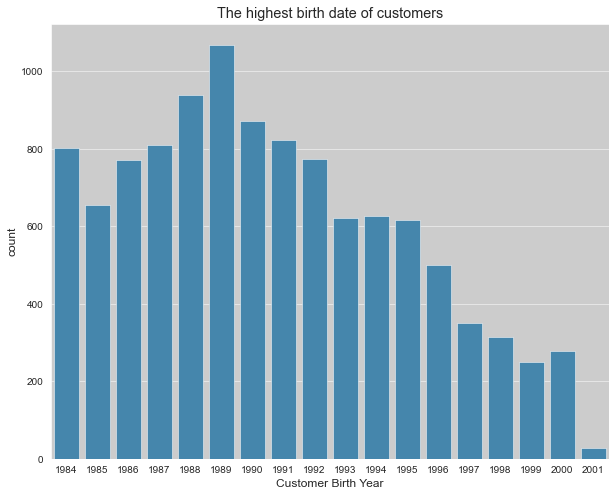

In [9]:
tmp_df = df.query(('member_birth_year >= 1984 and user_type == "Customer" '))
plt.figure(figsize = [10,8])
sb.countplot(data = tmp_df, x = 'member_birth_year', color = sb.color_palette()[0])
plt.title('The highest birth date of customers')
plt.xlabel('Customer Birth Year')
plt.show();

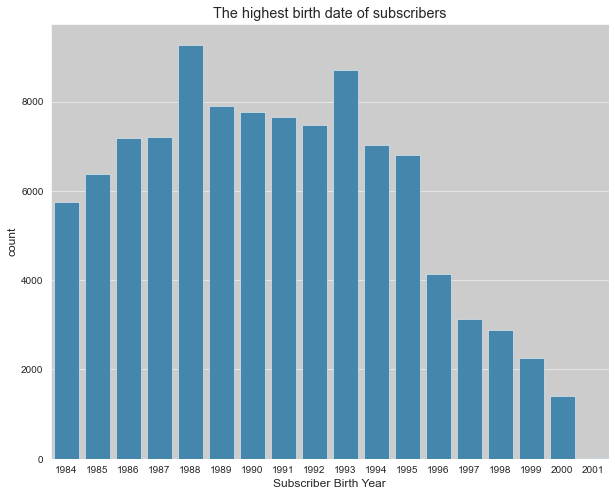

In [8]:
tmp_df2 = df.query(('member_birth_year >= 1984 and user_type == "Subscriber" '))
plt.figure(figsize = [10,8])
sb.countplot(data = tmp_df2, x = 'member_birth_year', color = sb.color_palette()[0])
plt.title('The highest birth date of subscribers')
plt.xlabel('Subscriber Birth Year')
plt.show();

> As we see in figures above the most of the subscribers and customers are born in  between 1988 and 1993.

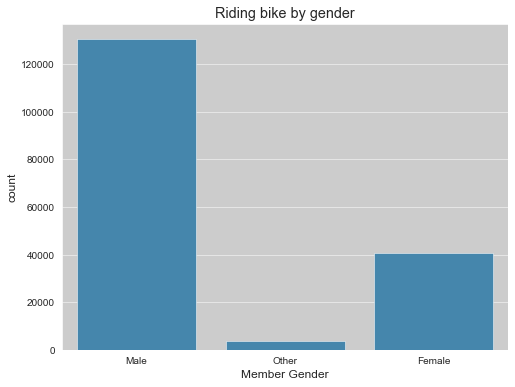

In [11]:
plt.figure(figsize = [8,6])
sb.countplot(data = df, x = 'member_gender', color = sb.color_palette()[0])
plt.title('Riding bike by gender')
plt.xlabel('Member Gender');

The figure shows that the male subscribers and customers are higher than females. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was not any unusual points or outliers, so i did not perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There wasn't any unusual distributions of the features I have investigated, and no operations was performed to tidy or adjust the data.

## Bivariate Exploration



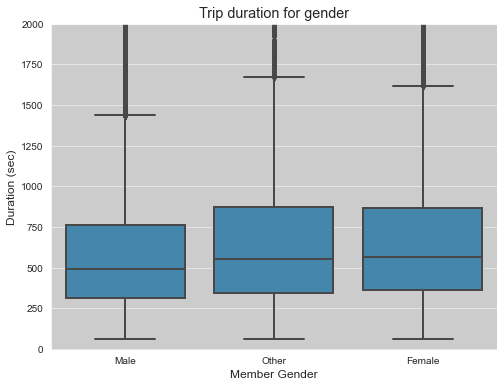

In [13]:
plt.figure(figsize = [8,6])
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = sb.color_palette()[0])
plt.ylim([-5, 2000])
plt.title('Trip duration for gender')
plt.xlabel('Member Gender')
plt.ylabel('Duration (sec)');

Since most of the riders are males the percentage of female riding is higher than males. 

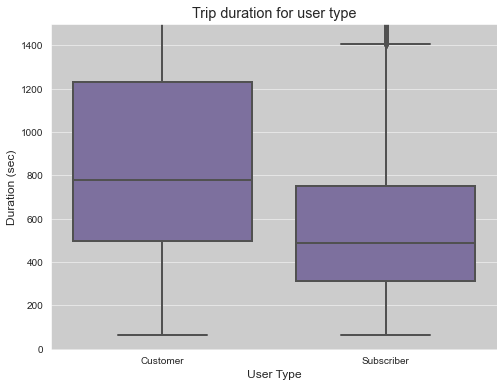

In [14]:
plt.figure(figsize = [8,6])
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = sb.color_palette()[2])
plt.ylim([-5, 1500])
plt.title('Trip duration for user type')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)');

According to the figure above the customers ride longer than the subscriber.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- We see that the trip duration depend on the gender and the user type of the customers and subscribers.
- Females ride the bikes longer than males.
- Also regardless of the gender the customers ride the bikes longer than the subscribers.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The features such as member_gender and user_type have a higher values by having a higher trip duration.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

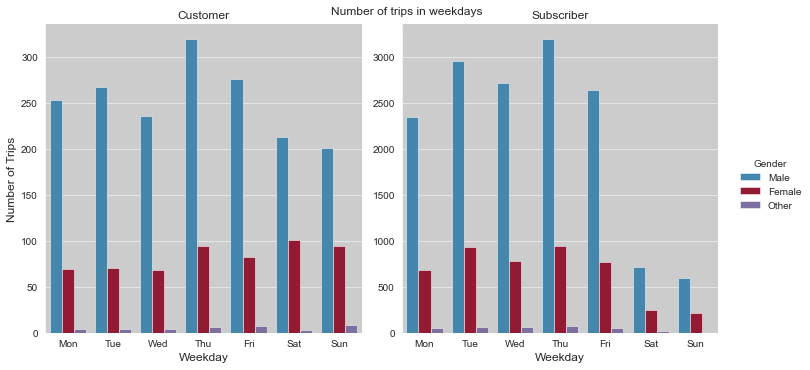

In [17]:

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
               order = weekdays)
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.set_axis_labels("Weekday", "Number of Trips")
plt.suptitle('Number of trips in weekdays');

The figure above shows that the though quantity of male riders is very high than other and female but we can see that the number of trips is higher on the weekdays than weekends.

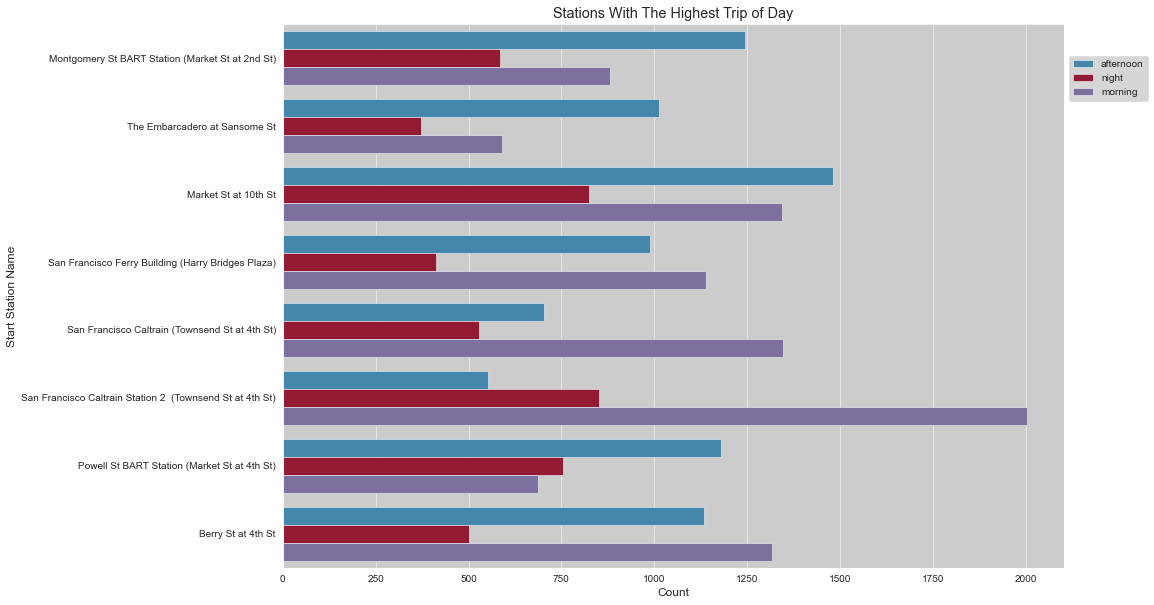

In [13]:
# Subset the dataset by keeping only top 8 locations with high traffics.
stations = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
df = df.loc[df['start_station_name'].isin(stations)]

plt.figure(figsize=(14,10))
sb.countplot(data=df, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.9))
plt.title('Stations With The Highest Trip of Day')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

The 'San Francisco Caltrain Station 2 (Townsend St at 4th St)' station has the highest trips in the morning & night, while 'Market St at 10th St' station has the highest trips in the afternoon.

In [14]:
df['age'] = datetime.now().year - df.member_birth_year

<ipython-input-14-0781d50bb9e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = datetime.now().year - df.member_birth_year


/Users/fasilsaeeud/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


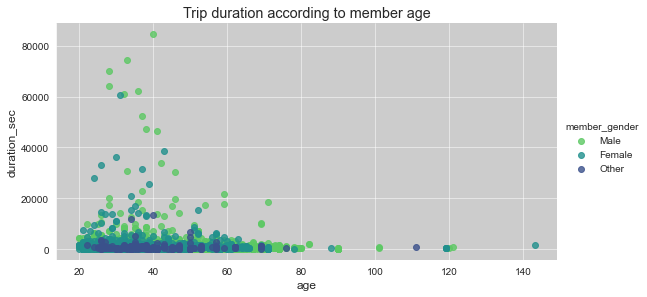

In [15]:
g = sb.FacetGrid(data = df, hue = 'member_gender', size = 4, aspect = 2, palette = 'viridis_r')
g.map(sb.regplot, 'age', 'duration_sec', fit_reg = False)
g.add_legend()
plt.title('Trip duration according to member age');

The concentration of rides are for persons between ages 20 and 60 showing the inverse relationship between age and the trip duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The number of trips is higher on the weekdays than weekends.
- The 'San Francisco Caltrain Station 2 (Townsend St at 4th St)' station has the highest trips in the morning & night.
- The 'Market St at 10th St' station has the highest trips in the afternoon.

### Were there any interesting or surprising interactions between features?

> I expect the relation between the member_birth_year and duration_sec well be positive, but the concentration of rides showing the inverse relationship between member_birth_year and the duration_sec.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration_template.ipynb'])

1